# Vorlesung 11-1

In [1]:
using Interact
using Plots
using LaTeXStrings
using LinearAlgebra
using Random

WebIO._IJuliaInit()

## (23.4) Zweite baryzentrische Formel für die Lagrange-Form der Interpolation

In [2]:
mutable struct Lagrange{T<:AbstractFloat}
    n             # order of polynomial
    x::Vector{T}  # nodes 
    λ::Vector{T}  # weights for barycentric formula
    f::Vector{T}  # f-values
    
    function Lagrange(x::Vector{T}) where T<:AbstractFloat
    # construction of weights
        n, λ = length(x), ones(T, size(x))
        for k = 2:n
            d = x[1:k-1] .- x[k]
            λ[1:k-1] ./=  d
            λ[k] /= prod(-d)
        end
        return new{T}(n, x, λ, zeros(T, size(x)))
    end
end

function LagrangeEval(p::Lagrange{T}, x::AbstractArray{T}) where {T<:AbstractFloat}
    num = den = zeros(T, size(x))
    for j=1:p.n                                         # 2nd barycentric formula
        num += (c = p.λ[j]./(x .- p.x[j]))*p.f[j]
        den += c
    end
    y = num./den
    ind = isnan.(y); y[ind] = p.f[indexin(x, p.x)[ind]] # evaluation at the nodes themselves
    return y
end

setf!(p::Lagrange{T}, f::Vector{T}) where {T<:AbstractFloat} = (p.f = f; p)

setf!(p::Lagrange{T}, f::Function)  where {T<:AbstractFloat} = setf!(p,f.(p.x))

Lagrange(x::Vector{T}, f) where {T<:AbstractFloat} = setf!(Lagrange(x), f)

LagrangeEval(p::Lagrange{T}, x::T) where {T<:AbstractFloat} = LagrangeEval(p, [x])[1]

(p::Lagrange)(x) = LagrangeEval(p, x) # enables calls of the form p(x)

## (23.7) Illustration der Formel von Taylor (1945)

In [3]:
EquidistantKnots(a, b, n) = range(a, b, length=n+1) |> collect;

In [4]:
@manipulate for n=6:12
    x = EquidistantKnots(-π,π,n)
    λ = Lagrange(x).λ'
    [λ/(λ[1]); ((-1).^(0:n).*binomial.(n,0:n))']
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 12, :min => 6, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
9, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/Folkmar/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/Folkmar/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/Folkmar/.julia/packages/InteractBase/o1I6G/src/../assets/all.js"), Asset("css", nothing, "/Users/Folkmar/.julia/packages/InteractBase/o1I6G/src/../assets/style.css"), Asset("css", nothing, "/Users/Folkmar/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000110872cb0, Task (runnable) @0x0000000110872cb0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"17446391288049318870\",\"id\":\"16330975497148248021\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"17446391288049318870\",\"

## Sensitivität der Polynominterpolation

In [5]:
ChebyshevKnots(a, b, n) = (a+b)/2 .+ (b-a)/2*cos.(range(0,π,length=n+1));

In [6]:
n = 24 # Polynomgrad
Random.seed!(0815); dy = randn(n+1) # zufällige Störung
xx = range(0, 2π, length=1000) # x-Werte für Plot

@manipulate for log10ϵ=-7:0.1:-1, knots=Dict("Chebyshev" => ChebyshevKnots, "equidistant" => EquidistantKnots), 
                    clipped=Dict("clipped" => true, "fill" => false)
    x = knots(0, 2π, n)
    y = sin.(x) + (10^log10ϵ)*dy
    yy = Lagrange(x,y)(xx)
    plot(xx, yy, linewidth=2)
    clipped && (plot!(ylims = (-4,4)))
    scatter!(x,y, xlabel = L"$x$", ylabel = L"$p(x)$", legend = false, xticks = (range(0,2π,length=9), 
            ["0" "π/4" "π/2" "3π/4" "π" "5π/4" "3π/2" "7π/4" "2π"]))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["log10ϵ"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 61, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
31, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/Folkmar/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/Folkmar/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/Folkmar/.julia/packages/InteractBase/o1I6G/src/../assets/all.js"), Asset("css", nothing, "/Users/Folkmar/.julia/packages/InteractBase/o1I6G/src/../assets/style.css"), Asset("css", nothing, "/Users/Folkmar/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000010f10d330, Task (runnable) @0x000000010f10d330), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-7.0\",\"-6.9\",\"-6.8\",\"-6.7\",\"-6.6\",\"-6.5\",\"-6.4\",\"-6.3\",\"-6.2\",\"-6.1\",\"-6.0\",\"-5.9\",\"-5.8\",\"-5.7\",\"-5.6\",\"-5.5\",\"-5.4\",\"-5.3\",\"-5.2\",\"-5.1\",\"-5.0\",\"-4.9\",\"-4.8\",\"-4.7\",\"-4.6\",\"-4.5\",\"-4.4\",\"-4.3\",\"-4.2\",\

## (23.8) Illustration der Formel von Salzer (1972)

In [7]:
@manipulate for n=6:12
    x = ChebyshevKnots(-π,π,n)
    λ = Lagrange(x).λ'
    λ/(2λ[1])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 12, :min => 6, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
9, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/Folkmar/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/Folkmar/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/Folkmar/.julia/packages/InteractBase/o1I6G/src/../assets/all.js"), Asset("css", nothing, "/Users/Folkmar/.julia/packages/InteractBase/o1I6G/src/../assets/style.css"), Asset("css", nothing, "/Users/Folkmar/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000115fffdb0, Task (runnable) @0x0000000115fffdb0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"12393633978397353836\",\"id\":\"9419216037175924415\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"12393633978397353836\",\"i

## (24.1) Lebesgue-Konstante

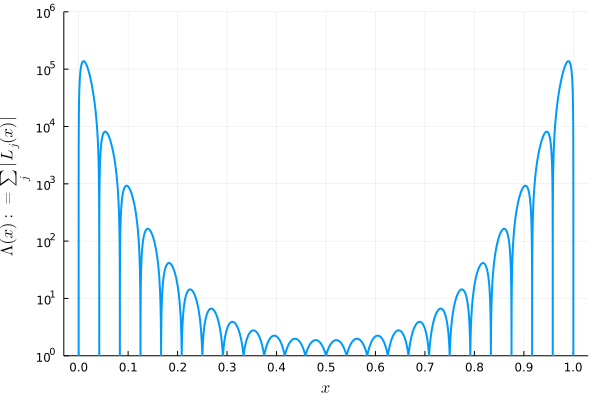

In [8]:
n = 24

x = EquidistantKnots(0, 1, n)
λ = Lagrange(x).λ

Λ(ξ) = abs(prod(ξ .- x))*sum(abs.(λ./abs.(ξ .- x)))

xx = 0.0:0.001/n:1.0
yy = Λ.(xx)
ind = isnan.(yy); yy[ind] .= 1.0

plot(xx, yy, yaxis = :log, linewidth = 2, legend = false, ylims = (1e-0, 1e6), 
    xticks = 0:0.1:1, xlabel = L"$x$", ylabel = L"$\Lambda(x) := \sum_j\; |\!L_j(x)\,|$")